In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#For logistic Regression model
from sklearn.linear_model import LogisticRegression # Focused Algorithm 

import statsmodels.api as sm
# calculate accuracy measures and confusion matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [108]:
data = pd.read_csv('bank-full.csv',sep = ';')

In [109]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [111]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [112]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [113]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [114]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [115]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [116]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [117]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [118]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [119]:
data['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [120]:
data['Target']= np.where(data['y']=='yes',1,0)
data['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [121]:
data.drop(['y'],axis=1, inplace=True)

In [122]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# EDA

In [123]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [124]:
# Custom Binary Encoding of Binary o/p variables 
data['default'] = np.where(data['default'] == "yes", 1, 0)
data['housing'] = np.where(data['housing']=="yes", 1, 0)
data['loan'] = np.where(data['loan']=="yes", 1, 0)

In [125]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0


In [126]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [127]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
data=data.replace(order)

In [128]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  int32 
dtypes: int32(4), int64(8), object(5)
memory usage: 5.2+ MB


In [130]:
ct= pd.crosstab(index=data['marital'],
           columns=data['Target'],
           values = data['Target'],
           aggfunc='count')
ct

Target,0,1
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


<AxesSubplot:xlabel='marital'>

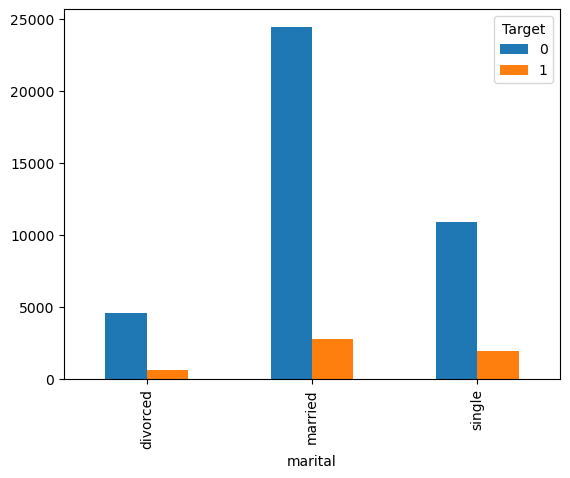

In [131]:
ct.plot(kind='bar')

In [132]:
ct=pd.crosstab(index=data['job'],
           columns=data['Target'],
           values = data['Target'],
           aggfunc='count')
ct

Target,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


<AxesSubplot:xlabel='job'>

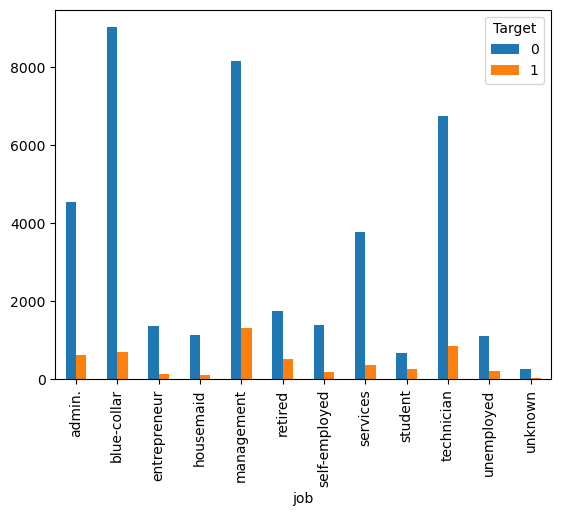

In [133]:
ct.plot(kind='bar')

In [134]:
X = data.drop(['Target'], axis=1)
Y = data[['Target']]

In [135]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,unknown


In [136]:
Y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [137]:
X = pd.get_dummies(X, drop_first=True)

In [138]:
X

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,1,0,1,0,0,1,0,0,0,1


In [139]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

In [140]:
#Logistic regression using stats model - method 'bfgs' - Broyden–Fletcher–Goldfarb–Shanno optimization
import statsmodels.api as sm

logreg = sm.Logit(Y, sm.add_constant(X) )
lg = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.249853
         Iterations 8


In [141]:
#Summary of logistic regression
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45178
Method:                           MLE   Df Model:                           32
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.3076
Time:                        19:37:20   Log-Likelihood:                -11296.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3973      0.174    -13.808      0.000      -2.738      -2.057
age                     0.0017      0.002      0.801      0.423      -0.002       0.006
default         

In [142]:
## Collect the coef in a dataframe
lgcoef = pd.DataFrame(lg.params, columns=['coef'])

lgcoef

,coef
const,-2.397327
age,0.001722
default,-0.155784
balance,0.000019
housing,-0.778768
loan,-0.560315
day,-0.004168
month,-0.018464
duration,0.004055
campaign,-0.106111


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [144]:
data.shape

(45211, 17)

In [145]:
X_train.shape

(31647, 32)

In [146]:
y_train.shape

(31647, 1)

In [147]:
45211*0.70

31647.699999999997

In [148]:
X_test.shape

(13564, 32)

In [149]:
y_test.shape

(13564, 1)

In [150]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [151]:
y_train_pred = model.predict(X_train)

In [152]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
metrics.accuracy_score(y_train, y_train_pred)

0.8891838088918381

In [154]:
y_test_pred = model.predict(X_test)

In [155]:
metrics.accuracy_score(y_test, y_test_pred)

0.8886021822471247

## Model Performance

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [157]:
confusion_matrix(y_test, y_test_pred)

array([[11736,   230],
       [ 1281,   317]], dtype=int64)

In [158]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

In [159]:
print(tn, fp, fn, tp)

11736 230 1281 317


In [160]:
recall_score(y_test, y_test_pred)

0.1983729662077597

In [161]:
precision_score(y_test, y_test_pred)

0.5795246800731262

In [162]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.58      0.20      0.30      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



In [163]:
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 0 0 0]


In [164]:
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob)

[[0.94764654 0.05235346]
 [0.9576825  0.0423175 ]
 [0.83842029 0.16157971]
 ...
 [0.95285815 0.04714185]
 [0.98617491 0.01382509]
 [0.78597437 0.21402563]]


In [165]:
confusion_matrix(y_test, y_test_pred)

array([[11736,   230],
       [ 1281,   317]], dtype=int64)

In [166]:
#AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_test_pred)
logit_roc_auc

0.5895759198413025

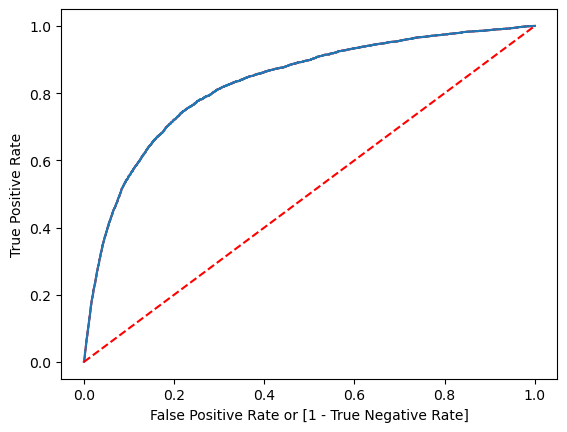

auc accuracy: 0.5895759198413025


In [183]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(Y,model.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_test_pred)

plt.plot(fpr,tpr,label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)